RF 진행

In [9]:
# !pip3 install holidays

In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\merged_user_data.csv")
df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,start_trial_day_of_week,last_trial_date,last_trial_covid_level,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,22,2,1.0,1.0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,23,2,3.0,3.0,1
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,19,2,3.0,3.0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,2,2021-06-30,4,2021,6,17,2,1.0,1.0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,3,2021-07-01,4,2021,7,16,3,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,5,2024-01-01,0,2024,1,23,0,12.0,12.0,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,5,2024-01-01,0,2024,1,18,0,3.0,3.0,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,5,2024-01-01,0,2024,1,18,0,6.0,6.0,0
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,0,2024-01-01,0,2024,1,18,0,3.0,3.0,0


유저별 사용 기간 중 공휴일 or 휴일 0/1 컬럼 생성

In [ ]:
import holidays
# 날짜 컬럼 변환
df['first_trial_date'] = pd.to_datetime(df['first_trial_date'])
df['last_trial_date'] = pd.to_datetime(df['last_trial_date'])

# 한국 공휴일 (연도 범위 지정: 필요에 따라 수정 가능)
kr_holidays = holidays.KR(years=range(2020, 2024))

# 공휴일 여부 함수
def has_holiday(row):
    for day in pd.date_range(row['first_trial_date'], row['last_trial_date']):
        if day in kr_holidays:
            return 1
    return 0

# 주말 여부 함수
def has_weekend(row):
    for day in pd.date_range(row['first_trial_date'], row['last_trial_date']):
        if day.weekday() >= 5:  # 5=토요일, 6=일요일
            return 1
    return 0

# 컬럼 생성
df['holiday'] = df.apply(has_holiday, axis=1)
df['weekend'] = df.apply(has_weekend, axis=1)

df = df.drop(["first_trial_date", "last_trial_date"], axis=1)


Index(['user_uuid', 'last_site_id', 'area_pyeong', 'stay_time_second_total',
       'trial_day', 'trial_gap', 'first_trial_covid_level', 'start_trial_year',
       'start_trial_month', 'start_trial_hour', 'start_trial_day_of_week',
       'last_trial_covid_level', 'final_trial_year', 'final_trial_month',
       'final_trial_hour', 'final_trial_day_of_week', 'check_in_total_count',
       'check_out_total_count', 'is_payment', 'holiday', 'weekend'],
      dtype='object')

In [13]:
df.columns

Index(['user_uuid', 'last_site_id', 'area_pyeong', 'stay_time_second_total',
       'trial_day', 'trial_gap', 'first_trial_covid_level', 'start_trial_year',
       'start_trial_month', 'start_trial_hour', 'start_trial_day_of_week',
       'last_trial_covid_level', 'final_trial_year', 'final_trial_month',
       'final_trial_hour', 'final_trial_day_of_week', 'check_in_total_count',
       'check_out_total_count', 'is_payment', 'holiday', 'weekend'],
      dtype='object')

In [16]:
# 기준 컬럼
col = "stay_time_second_total"

# Q1, Q3, IQR 계산
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 이상치 여부
outliers = (df[col] < lower) | (df[col] > upper)

# 이상치 데이터프레임
df_stay_outlier = df[outliers].copy()

# 이상치 개수 & 비율
n_outliers = df_stay_outlier.shape[0]
ratio_outliers = n_outliers / df.shape[0] * 100

# 이상치 제거 후 데이터
df_no_outlier = df[~outliers].copy()
n_after = df_no_outlier.shape[0]

print(f"이상치 개수: {n_outliers}")
print(f"이상치 비율: {ratio_outliers:.2f}%")
print(f"제거 후 전체 데이터 수: {n_after}")

이상치 개수: 277
이상치 비율: 5.05%
제거 후 전체 데이터 수: 5205


In [19]:
df_no_outlier

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_covid_level,start_trial_year,start_trial_month,start_trial_hour,...,last_trial_covid_level,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,holiday,weekend
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,4,2021,6,20,...,4,2021,6,22,2,1.0,1.0,0,0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,4,2021,6,0,...,4,2021,6,23,2,3.0,3.0,1,0,0
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,4,2021,6,15,...,4,2021,6,19,2,3.0,3.0,0,0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,4,2021,6,13,...,4,2021,6,17,2,1.0,1.0,0,0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,4,2021,7,13,...,4,2021,7,16,3,1.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,0,2023,12,15,...,0,2024,1,23,0,12.0,12.0,1,1,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,0,2023,12,18,...,0,2024,1,18,0,3.0,3.0,1,1,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,0,2023,12,15,...,0,2024,1,18,0,6.0,6.0,0,1,1
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,0,2024,1,15,...,0,2024,1,18,0,3.0,3.0,0,1,0


- 사이클릭

In [21]:
import numpy as np

df_cyclic = df_no_outlier.copy()

cyclic_features = {
    "start_trial_month": 12,         # 1~12
    "start_trial_hour": 24,          # 0~23
    "start_trial_day_of_week": 7,    # 0~6
    "final_trial_month": 12,
    "final_trial_hour": 24,
    "final_trial_day_of_week": 7
}

for col, period in cyclic_features.items():
    df_cyclic[f"{col}_sin"] = np.sin(2 * np.pi * df_cyclic[col] / period)
    df_cyclic[f"{col}_cos"] = np.cos(2 * np.pi * df_cyclic[col] / period)

# 결과 확인
df_cyclic  # 원 데이터 컬럼도 존재하는 버전

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_covid_level,start_trial_year,start_trial_month,start_trial_hour,...,start_trial_hour_sin,start_trial_hour_cos,start_trial_day_of_week_sin,start_trial_day_of_week_cos,final_trial_month_sin,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,4,2021,6,20,...,-0.866025,5.000000e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,4,2021,6,0,...,0.000000,1.000000e+00,0.974928,-0.222521,1.224647e-16,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,4,2021,6,15,...,-0.707107,-7.071068e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,4,2021,6,13,...,-0.258819,-9.659258e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,4,2021,7,13,...,-0.258819,-9.659258e-01,0.433884,-0.900969,-5.000000e-01,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,0,2023,12,15,...,-0.707107,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-0.258819,9.659258e-01,0.000000,1.000000
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,0,2023,12,18,...,-1.000000,-1.836970e-16,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,0,2023,12,15,...,-0.707107,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,0,2024,1,15,...,-0.707107,-7.071068e-01,0.000000,1.000000,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000


Index(['user_uuid', 'last_site_id', 'area_pyeong', 'stay_time_second_total',
       'trial_day', 'trial_gap', 'first_trial_covid_level', 'start_trial_year',
       'start_trial_month', 'start_trial_hour', 'start_trial_day_of_week',
       'last_trial_covid_level', 'final_trial_year', 'final_trial_month',
       'final_trial_hour', 'final_trial_day_of_week', 'check_in_total_count',
       'check_out_total_count', 'is_payment', 'holiday', 'weekend',
       'start_trial_month_sin', 'start_trial_month_cos',
       'start_trial_hour_sin', 'start_trial_hour_cos',
       'start_trial_day_of_week_sin', 'start_trial_day_of_week_cos',
       'final_trial_month_sin', 'final_trial_month_cos',
       'final_trial_hour_sin', 'final_trial_hour_cos',
       'final_trial_day_of_week_sin', 'final_trial_day_of_week_cos'],
      dtype='object')

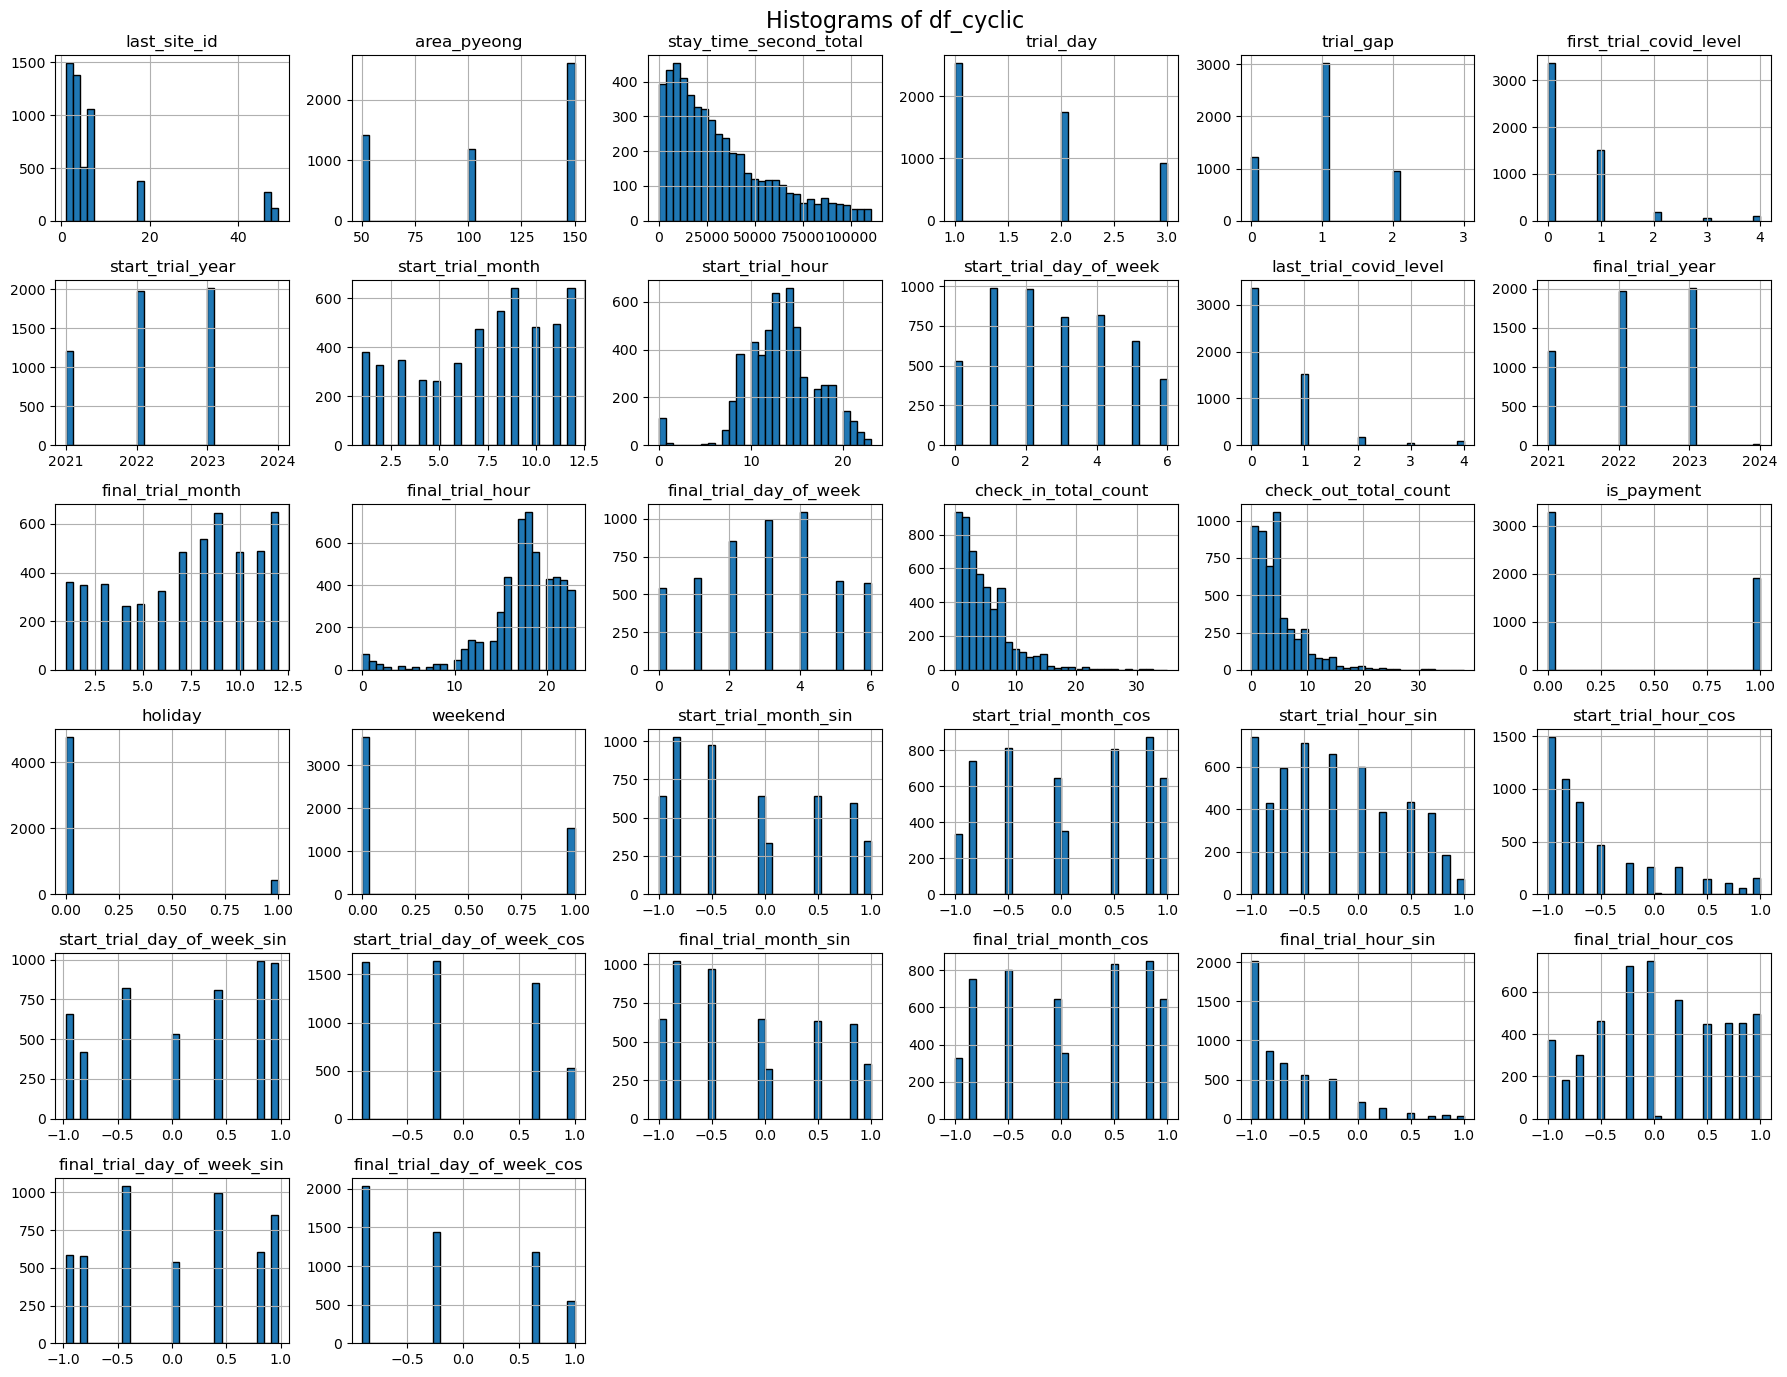

In [23]:
import matplotlib.pyplot as plt

# DataFrame 전체 hist (숫자형 컬럼만 자동 선택)
df_cyclic.hist(figsize=(18, 14), bins=30, edgecolor='black')

plt.suptitle("Histograms of df_cyclic", fontsize=16)
plt.tight_layout()
plt.show()

stay_time_second_total 변환 완료 (lambda=0.3360)
check_in_total_count 변환 완료 (lambda=-0.2238)
check_out_total_count 변환 완료 (lambda=-0.2179)


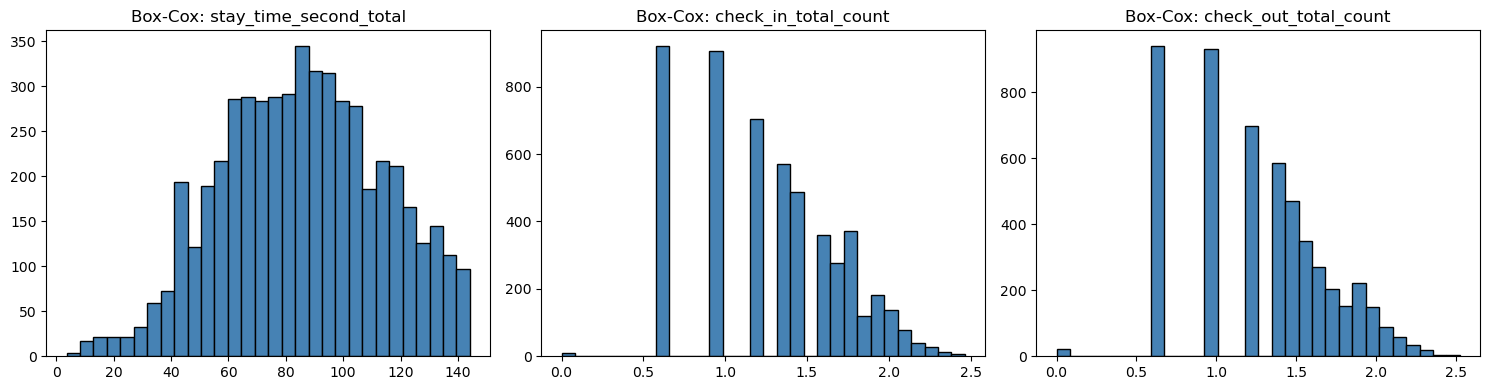

In [24]:
from scipy.stats import boxcox

# 복사본 생성
df_final = df_cyclic.copy()

# Box-Cox 적용할 컬럼
cols_to_boxcox = [
    "stay_time_second_total",
    "check_in_total_count",
    "check_out_total_count"
]

# Box-Cox 변환
for col in cols_to_boxcox:
    # 0 이상이어야 하므로 +1 처리
    df_final[col], lam = boxcox(df_final[col] + 1)
    print(f"{col} 변환 완료 (lambda={lam:.4f})")


cols_to_plot = [
    "stay_time_second_total",
    "check_in_total_count",
    "check_out_total_count"
]

plt.figure(figsize=(15, 4))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.hist(df_final[col], bins=30, edgecolor='black', color="steelblue")
    plt.title(f"Box-Cox: {col}")

plt.tight_layout()
plt.show()

In [25]:
df_final

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_covid_level,start_trial_year,start_trial_month,start_trial_hour,...,start_trial_hour_sin,start_trial_hour_cos,start_trial_day_of_week_sin,start_trial_day_of_week_cos,final_trial_month_sin,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,54.424580,1,0,4,2021,6,20,...,-0.866025,5.000000e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,132.294924,1,3,4,2021,6,0,...,0.000000,1.000000e+00,0.974928,-0.222521,1.224647e-16,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,71.469882,1,0,4,2021,6,15,...,-0.707107,-7.071068e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,68.935470,1,0,4,2021,6,13,...,-0.258819,-9.659258e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,56.986182,1,1,4,2021,7,13,...,-0.258819,-9.659258e-01,0.433884,-0.900969,-5.000000e-01,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,133.269600,3,0,0,2023,12,15,...,-0.707107,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-0.258819,9.659258e-01,0.000000,1.000000
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,54.508151,2,0,0,2023,12,18,...,-1.000000,-1.836970e-16,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,95.175727,2,0,0,2023,12,15,...,-0.707107,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,66.831222,1,2,0,2024,1,15,...,-0.707107,-7.071068e-01,0.000000,1.000000,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000


### 표준화는 안함) 새로운 컬럼 생성 → 이상치 제거 → 정규화(box-cox) 만 진행

In [26]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [27]:
# X, y 분리 (is_payment는 목표변수, user_uuid 같은 ID 계열은 제거)
X = df_final.drop(columns=["is_payment", "user_uuid"], errors="ignore")
y = df_final["is_payment"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optuna 목적 함수 정의
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 5, 50),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)

    # 교차 검증 (f1-score 기준 최적화)
    score = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring="f1", n_jobs=-1
    ).mean()

    return score

# Optuna 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print("Best Trial Params:", study.best_trial.params)
print("Best CV f1 Score:", study.best_value)

# 최적 모델로 학습 후 테스트셋 평가
best_params = study.best_trial.params
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

[I 2025-09-06 17:26:21,604] A new study created in memory with name: no-name-f4db5503-7c61-452e-a536-8d7809652315
[I 2025-09-06 17:26:53,190] Trial 0 finished with value: 0.46135653659230097 and parameters: {'n_estimators': 745, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.46135653659230097.
[I 2025-09-06 17:26:58,012] Trial 1 finished with value: 0.4769258232347484 and parameters: {'n_estimators': 145, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 1 with value: 0.4769258232347484.
[I 2025-09-06 17:27:06,085] Trial 2 finished with value: 0.492938376557999 and parameters: {'n_estimators': 874, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.492938376557999.
[I 2025-09-06 17:27:31,363] Trial 3 finished with value: 0.3818450964111065 and parameters: {'n_estimators': 466, 'max_depth': 20, 'min

Best Trial Params: {'n_estimators': 637, 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': None}
Best CV f1 Score: 0.4999701148352777
              precision    recall  f1-score   support

           0     0.6544    0.8904    0.7544       657
           1     0.5102    0.1953    0.2825       384

    accuracy                         0.6340      1041
   macro avg     0.5823    0.5429    0.5184      1041
weighted avg     0.6012    0.6340    0.5803      1041



In [28]:
# X, y 분리 (is_payment는 목표변수, user_uuid 같은 ID 계열은 제거)
X = df_final.drop(columns=["is_payment", "user_uuid"], errors="ignore")
y = df_final["is_payment"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optuna 목적 함수 정의
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        # "max_depth": trial.suggest_int("max_depth", 5, 50),
        # "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        # "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        # "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)

    # 교차 검증 (f1-score 기준 최적화)
    score = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring="f1", n_jobs=-1
    ).mean()

    return score

# Optuna 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best Trial Params:", study.best_trial.params)
print("Best CV f1 Score:", study.best_value)

# 최적 모델로 학습 후 테스트셋 평가
best_params = study.best_trial.params
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

[I 2025-09-06 17:48:08,799] A new study created in memory with name: no-name-f529c3d2-3e9c-45e8-9bcf-4368ebfb8c30
[I 2025-09-06 17:48:18,749] Trial 0 finished with value: 0.34849013445299337 and parameters: {'n_estimators': 645}. Best is trial 0 with value: 0.34849013445299337.
[I 2025-09-06 17:48:23,062] Trial 1 finished with value: 0.3521935183598189 and parameters: {'n_estimators': 283}. Best is trial 1 with value: 0.3521935183598189.
[I 2025-09-06 17:48:37,935] Trial 2 finished with value: 0.34879026728857665 and parameters: {'n_estimators': 987}. Best is trial 1 with value: 0.3521935183598189.
[I 2025-09-06 17:48:49,238] Trial 3 finished with value: 0.35057517345692674 and parameters: {'n_estimators': 735}. Best is trial 1 with value: 0.3521935183598189.
[I 2025-09-06 17:48:52,362] Trial 4 finished with value: 0.3416759792802037 and parameters: {'n_estimators': 187}. Best is trial 1 with value: 0.3521935183598189.
[I 2025-09-06 17:49:01,914] Trial 5 finished with value: 0.34602531

Best Trial Params: {'n_estimators': 345}
Best CV f1 Score: 0.35549561230345883
              precision    recall  f1-score   support

           0     0.6547    0.8341    0.7336       657
           1     0.4657    0.2474    0.3231       384

    accuracy                         0.6177      1041
   macro avg     0.5602    0.5407    0.5284      1041
weighted avg     0.5850    0.6177    0.5822      1041

